# 영화 평점 분석 실습

In [63]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

## 1. 영화 평점 데이터 적재 및 전처리

In [64]:
# 사용자 데이터 읽어오기
users = pd.read_csv('data/movielens/users.dat', sep = '::', engine = 'python',
                   names = ['사용자아이디', '성별','연령','직업','지역'])
users.head()

,사용자아이디,성별,연령,직업,지역
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [65]:
# 평점 데이터 읽어오기
ratings = pd.read_csv('data/movielens/ratings.dat', sep = '::', engine = 'python',
                   names = ['사용자아이디', '영화아이디','평점','타임스탬프'])
ratings.head()

,사용자아이디,영화아이디,평점,타임스탬프
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [66]:
# 영화데이터 읽어오기
movies = pd.read_csv('data/movielens/movies.dat', sep = '::', engine = 'python',
                   names = ['영화아이디','영화제목','장르'], encoding = 'latin-1')
movies.head()

,영화아이디,영화제목,장르
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [67]:
#3개의 데이터프레임을 하나로 합치기
data=pd.merge(users,ratings)
data=pd.merge(data,movies)
data.head()

,사용자아이디,성별,연령,직업,지역,영화아이디,평점,타임스탬프,영화제목,장르
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [68]:
print('사용자수:',len(users))
print('리뷰수:',len(ratings))
print('영화수:',len(movies))

사용자수: 6040
리뷰수: 1000209
영화수: 3883


In [69]:
# 모든 사용자가 리뷰를 했나? --> 모든 사용자가 영화 리뷰에 참여함 
#리뷰를 남긴 사람은 사용자 아이디가 있을것 - 사용자 아이디 개수 세줌
#nunique: 중복되지 않는 데이터 세어줌 
ratings.사용자아이디.nunique()

6040

In [70]:
#리뷰가 없는 영화는 있는가?
ratings.nunique()
#176개의 영화는 리뷰가 없음 (영화의 원래 영화 수 - 평점의 영화아이디 = 3883 - 3706)

사용자아이디      6040
영화아이디       3706
평점             5
타임스탬프     458455
dtype: int64

## 2. 보고 싶은 영화 찾기
영화들의 평점 평균을 구하여, 사람들에게 인정받는 (평점이 높은) 영화 찾기

In [71]:
# 영화들의 평점 평균을 구하여, 평점이 높은 영화 찾기 

In [72]:
#중복된 영화 제목이 있는지 확인(있으면 -> 영화 아이디로 인덱스 할당 ) --> 여기서는 중복 X
#movies.nunique()
#3883개가 나오는지 
movies.영화제목.nunique()

3883

In [73]:
#만약 중복 됐다하면 index =['영화아이디'.'영화제목']

In [74]:
#data.pivot_table(index='영화제목',values='평점',aggfunc='mean').sort_values(by='평점',ascending=False).head(10)
data.pivot_table(index='영화제목',values='평점',aggfunc='mean').nlargest(10,'평점')

,평점
영화제목,
"Baby, The (1973)",5.0
Bittersweet Motel (2000),5.0
Follow the Bitch (1998),5.0
"Gate of Heavenly Peace, The (1995)",5.0
Lured (1947),5.0
One Little Indian (1973),5.0
Schlafes Bruder (Brother of Sleep) (1995),5.0
Smashing Time (1967),5.0
Song of Freedom (1936),5.0


In [75]:
data.pivot_table(index=['영화아이디','영화제목'],values='평점',aggfunc='mean').nlargest(10,'평점')

,,평점
영화아이디,영화제목,
787,"Gate of Heavenly Peace, The (1995)",5.0
989,Schlafes Bruder (Brother of Sleep) (1995),5.0
1830,Follow the Bitch (1998),5.0
3172,Ulysses (Ulisse) (1954),5.0
3233,Smashing Time (1967),5.0
3280,"Baby, The (1973)",5.0
3382,Song of Freedom (1936),5.0
3607,One Little Indian (1973),5.0
3656,Lured (1947),5.0


평균 평점이 만점인 영화들이 최상위에 위치함. 
일반적으로 평점이 만점인 경우는 대부분 평점의 개수가 매우 적은 경우이므로, 이를 확인하기 위해 평점의 개수도 함께 구해본다. 

In [76]:
data.pivot_table(index='영화제목',values='평점',aggfunc=['mean','count']).nlargest(10,('mean','평점'))

,mean,count
,평점,평점
영화제목,,
"Baby, The (1973)",5.0,1
Bittersweet Motel (2000),5.0,1
Follow the Bitch (1998),5.0,1
"Gate of Heavenly Peace, The (1995)",5.0,3
Lured (1947),5.0,1
One Little Indian (1973),5.0,1
Schlafes Bruder (Brother of Sleep) (1995),5.0,1
Smashing Time (1967),5.0,2


In [77]:
#평점 평균이 4.5 이상이고, 평점의 개수가 1000개 이상인 영화를 보고싶은 영화로 지정
영화평점 = data.pivot_table(index='영화제목',values='평점',aggfunc=['mean','count'])

In [78]:
영화평점.columns =['평점평균','평점개수']

In [79]:
영화평점[(영화평점.평점평균>=4.4)&(영화평점.평점개수 >= 1000)]

,평점평균,평점개수
영화제목,,
Casablanca (1942),4.412822,1669
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),4.449890,1367
"Godfather, The (1972)",4.524966,2223
Raiders of the Lost Ark (1981),4.477725,2514
Rear Window (1954),4.476190,1050
Schindler's List (1993),4.510417,2304
"Shawshank Redemption, The (1994)",4.554558,2227
"Sixth Sense, The (1999)",4.406263,2459
Star Wars: Episode IV - A New Hope (1977),4.453694,2991


## [실습 #1] 여자들이 좋아하는 영화 찾기 
### - 여성 평점이 4.0 이상이고 여성 평점의 개수가 500개 이상인 영화

In [80]:
# 1) 여성이 매긴 평점 데이터만 활용
여성영화평점 = data[data['성별']=='F'].pivot_table(index='영화제목',values='평점',aggfunc=['mean','count'])
여성영화평점[(여성영화평점[('mean','평점')]>=4.0)&(여성영화평점[('count','평점')]>=500)]



,mean,count
,평점,평점
영화제목,,
American Beauty (1999),4.238901,946
Being John Malkovich (1999),4.159930,569
Braveheart (1995),4.016484,546
Casablanca (1942),4.300990,505
E.T. the Extra-Terrestrial (1982),4.089850,601
Fargo (1996),4.217656,657
Forrest Gump (1994),4.045031,644
L.A. Confidential (1997),4.106007,566


In [81]:
# 2) 영화별 성별 평점을 구하기
ex1 = data.pivot_table(index='영화제목',columns ='성별',values='평점',aggfunc=['mean','count'])
ex1[(ex1[('mean','F')]>=4.0)&(ex1[('count','F')]>=500)]

mean            count  \
성별                                                         F         M      F   
영화제목                                                                            
American Beauty (1999)                              4.238901  4.347301  946.0   
Being John Malkovich (1999)                         4.159930  4.113636  569.0   
Braveheart (1995)                                   4.016484  4.297839  546.0   
Casablanca (1942)                                   4.300990  4.461340  505.0   
E.T. the Extra-Terrestrial (1982)                   4.089850  3.920264  601.0   
Fargo (1996)                                        4.217656  4.267780  657.0   
Forrest Gump (1994)                                 4.045031  4.105806  644.0   
L.A. Confidential (1997)                            4.106007  4.256678  566.0   
Matrix, The (1999)                                  4.128405  4.362235  514.0   
Princess Bride, The (1987)                          4.342767  4.288942  636.0   
Pulp Fiction (1994)                                 4.071956  4.346839  542.0   
Raiders of the Lost Ark (1981)                      4.332168  4.520597  572.0   
Saving Private Ryan (1998)                          4.114783  4.398941  575.0   
Schindler's List (1993)                             4.562602  4.491415  615.0   
Shakespeare in Love (1998)                          4.181704  4.099936  798.0   
Shawshank Redemption, The (1994)                    4.539075  4.560625  627.0   
Silence of the Lambs, The (1991)                    4.271955  4.381944  706.0   
Sixth Sense, The (1999)                             4.477410  4.379944  664.0   
Star Wars: Episode IV - A New Hope (1977)           4.302937  4.495307  647.0   
Star Wars: Episode V - The Empire Strikes Back ...  4.106481  4.344577  648.0   
Toy Story (1995)                                    4.187817  4.130552  591.0   
Wizard of Oz, The (1939)                            4.355030  4.203138  507.0   

                                                            
성별                                                       M  
영화제목                                                        
American Beauty (1999)                              2482.0  
Being John Malkovich (1999)                         1672.0  
Braveheart (1995)                                   1897.0  
Casablanca (1942)                                   1164.0  
E.T. the Extra-Terrestrial (1982)                   1668.0  
Fargo (1996)                                        1856.0  
Forrest Gump (1994)                                 1550.0  
L.A. Confidential (1997)                            1722.0  
Matrix, The (1999)                                  2076.0  
Princess Bride, The (1987)                          1682.0  
Pulp Fiction (1994)                                 1629.0  
Raiders of the Lost Ark (1981)                      1942.0  
Saving Private Ryan (1998)                          2078.0  
Schindler's List (1993)                             1689.0  
Shakespeare in Love (1998)                          1571.0  
Shawshank Redemption, The (1994)                    1600.0  
Silence of the Lambs, The (1991)                    1872.0  
Sixth Sense, The (1999)                             1795.0  
Star Wars: Episode IV - A New Hope (1977)           2344.0  
Star Wars: Episode V - The Empire Strikes Back ...  2342.0  
Toy Story (1995)                                    1486.0  
Wizard of Oz, The (1939)                            1211.0

## [실습 #2] 실습 #1에서 구한 영화(여성인기영화)의 장르를 분석해 보자.
여성인기영화의 장르 통계 구하기

예를 들어, 여성인기영화 중 Drama 장르의 영화는 10개, Action 영화는 3개, ...

In [82]:
여성인기영화 = ex1[(ex1[('mean','F')]>=4.0)&(ex1[('count','F')]>=500)].index

In [83]:
ex2 = movies[movies.영화제목.isin(여성인기영화)]

In [84]:
ex2 = ex2.장르.str.split('|',expand=True)
#expand=True : 데이터프레임으로 리턴

In [85]:
장르1 = ex2[0].value_counts()
장르2 = ex2[1].value_counts()
장르3 = ex2[2].value_counts()
장르4 = ex2[3].value_counts()
장르5 = ex2[4].value_counts()

In [86]:
#장르1+장르2+장르3+장르4+장르5
장르1.add(장르2,fill_value = 0).add(장르3,fill_value = 0).add(장르4,fill_value = 0).add(장르5,fill_value = 0)

Action         7.0
Adventure      5.0
Animation      1.0
Children's     3.0
Comedy         6.0
Crime          3.0
Drama         12.0
Fantasy        2.0
Film-Noir      1.0
Musical        1.0
Mystery        1.0
Romance        4.0
Sci-Fi         4.0
Thriller       5.0
War            6.0
dtype: float64

In [87]:
#위를 루프문으로 
sr = Series(dtype = 'float64')
for col in ex2.columns:
    sr = sr.add(ex2[col].value_counts(),fill_value=0)
#ex2.columns-[0,1,2,3,4]
#dtype - warning 메세지 하라는대로 

In [88]:
sr.sort_values(ascending = False)

Drama         12.0
Action         7.0
Comedy         6.0
War            6.0
Adventure      5.0
Thriller       5.0
Romance        4.0
Sci-Fi         4.0
Children's     3.0
Crime          3.0
Fantasy        2.0
Animation      1.0
Film-Noir      1.0
Musical        1.0
Mystery        1.0
dtype: float64

In [89]:
장르[0].value_counts()

Action        7
Drama         4
Comedy        4
Crime         3
Adventure     1
Animation     1
Thriller      1
Children's    1
Name: 0, dtype: int64

In [90]:
#내 방법
여성인기영화 = 여성영화평점[(여성영화평점[('mean','평점')]>=4.0)&(여성영화평점[('count','평점')]>=500)].index
여성인기영화 = movies[movies.영화제목.isin(여성인기영화)]
장르 = 여성인기영화.장르.str.split('|',expand=True)
장르1 = 장르[0].value_counts()
장르2 = 장르[1].value_counts()
장르3 = 장르[2].value_counts()
장르4 = 장르[3].value_counts()
장르5 = 장르[4].value_counts()
장르1.add(장르2,fill_value = 0).add(장르3,fill_value = 0).add(장르4,fill_value = 0).add(장르5,fill_value = 0)

Action         7.0
Adventure      5.0
Animation      1.0
Children's     3.0
Comedy         6.0
Crime          3.0
Drama         12.0
Fantasy        2.0
Film-Noir      1.0
Musical        1.0
Mystery        1.0
Romance        4.0
Sci-Fi         4.0
Thriller       5.0
War            6.0
dtype: float64

## [실습 #3] 남자와 여자의 호불호가 크게 갈리는 영화 10개 찾기
전체 평점의 개수가 500개 이상인 영화만 대상으로 함.

In [91]:
ex3 = data.pivot_table(index='영화제목',columns ='성별',values='평점',aggfunc=['mean','count'])
ex3

mean           count       
성별                                                 F         M     F      M
영화제목                                                                       
$1,000,000 Duck (1971)                      3.375000  2.761905  16.0   21.0
'Night Mother (1986)                        3.388889  3.352941  36.0   34.0
'Til There Was You (1997)                   2.675676  2.733333  37.0   15.0
'burbs, The (1989)                          2.793478  2.962085  92.0  211.0
...And Justice for All (1979)               3.828571  3.689024  35.0  164.0
...                                              ...       ...   ...    ...
Zed & Two Noughts, A (1985)                 3.500000  3.380952   8.0   21.0
Zero Effect (1998)                          3.864407  3.723140  59.0  242.0
Zero Kelvin (Kjærlighetens kjøtere) (1995)       NaN  3.500000   NaN    2.0
Zeus and Roxanne (1997)                     2.777778  2.357143   9.0   14.0
eXistenZ (1999)                             3.098592  3.289086  71.0  339.0

[3706 rows x 4 columns]

In [92]:
#전체 평점 개수가 500 이상인 영화만 선택
ex3 = ex3[ex3[('count','F')] + ex3[('count','M')] >=  500]
#ex3[ex3['count'].sum(axis = 1) >= 500] 
ex3

mean            count        
성별                                            F         M      F       M
영화제목                                                                    
10 Things I Hate About You (1999)      3.646552  3.311966  232.0   468.0
101 Dalmatians (1961)                  3.791444  3.500000  187.0   378.0
12 Angry Men (1957)                    4.184397  4.328421  141.0   475.0
13th Warrior, The (1999)               3.112000  3.168000  125.0   625.0
20,000 Leagues Under the Sea (1954)    3.670103  3.709205   97.0   478.0
...                                         ...       ...    ...     ...
X-Files: Fight the Future, The (1998)  3.489474  3.493797  190.0   806.0
X-Men (2000)                           3.682310  3.851702  277.0  1234.0
You've Got Mail (1998)                 3.542424  3.275591  330.0   508.0
Young Frankenstein (1974)              4.289963  4.239177  269.0   924.0
Young Guns (1988)                      3.371795  3.425620   78.0   484.0

[618 rows x 4 columns]

In [93]:
abs(ex3[('mean','F')]-ex3[('mean','M')]).nlargest(10)
#ex3['남녀차이'] = abs(ex3[('mean','F')] - ex3[('mean','M')])
#ex3.남녀차이.nlargest(10)

영화제목
Dirty Dancing (1987)                      0.830782
Good, The Bad and The Ugly, The (1966)    0.726351
Dumb & Dumber (1994)                      0.638608
Evil Dead II (Dead By Dawn) (1987)        0.611985
Grease (1978)                             0.608224
Caddyshack (1980)                         0.573602
Animal House (1978)                       0.538286
Exorcist, The (1973)                      0.529605
Rocky Horror Picture Show, The (1975)     0.512885
Big Trouble in Little China (1986)        0.497078
dtype: float64

## [실습 #4] 연령대 별로 영화 평점 분석하기
연령대(10대 미만, 10대, 20대, ...50대) 컬럼을 추가한 후, 영화별 연령대별 영화평점 구하기

In [ ]:
data.연령.describe()
#1세 ~ 56세 

In [95]:
#함수 정의
def generate_ages(x):
    if x<10:
        return '10대 미만'
    elif x<20:
        return '10대'
    elif x<30:
        return '20대'
    elif x<40:
        return '30대'
    elif x<50:
        return '40대'
    else:
        return '50대 이상'

In [ ]:
generate_ages(58)

In [96]:
data['연령대'] = data.연령.apply(generate_ages)
data

,사용자아이디,성별,연령,직업,지역,영화아이디,평점,타임스탬프,영화제목,장르,연령대
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,10대 미만
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,50대 이상
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,20대
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,20대
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,50대 이상
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary,10대
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama,30대
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama,10대
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western,10대


In [97]:
ex4 = data.pivot_table(index='영화제목',columns ='연령대', values = '평점',aggfunc='mean')
ex4

연령대,10대,10대 미만,20대,30대,40대,50대 이상
영화제목,,,,,,
"$1,000,000 Duck (1971)",3.000000,NaN,3.090909,3.133333,2.000000,2.750000
'Night Mother (1986),4.666667,2.000000,3.423077,2.904762,3.833333,3.750000
'Til There Was You (1997),2.500000,3.500000,2.666667,2.900000,2.333333,2.600000
"'burbs, The (1989)",3.244444,4.500000,2.652174,2.818182,2.545455,3.100000
...And Justice for All (1979),3.428571,3.000000,3.724138,3.657143,4.100000,3.674419
...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",3.000000,1.000000,3.375000,3.777778,4.000000,3.000000
Zero Effect (1998),3.883333,4.125000,3.715278,3.608696,3.764706,3.769231
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,NaN,NaN,3.500000,NaN,NaN


AttributeError: 'Line2D' object has no property 'kinf'

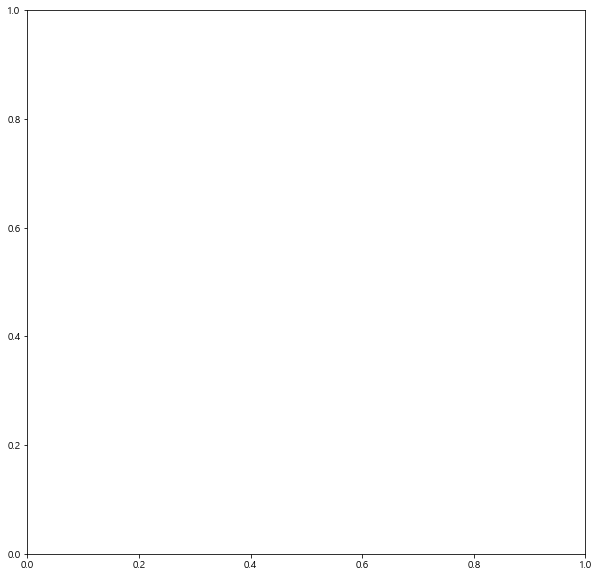

In [98]:
#그래프로 그려보기
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
ex4[:10].plot(kinf = 'barh', figsize =(10,10))